# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
import numpy as np
from skimage import morphology

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale


Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

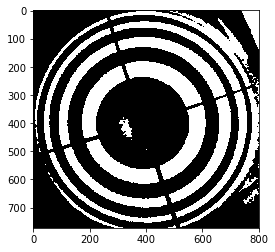

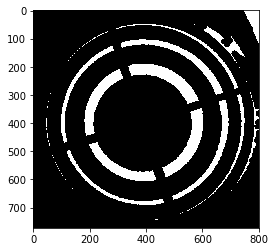

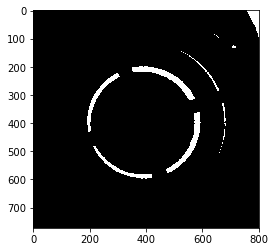

In [2]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
ec1=morphology.erosion(contour , morphology.disk(1))
ec2=morphology.erosion(contour , morphology.disk(10))
ec3=morphology.erosion(contour , morphology.disk(20))
plt.figure
plt.imshow(ec1, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(ec2, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(ec3, cmap=plt.cm.gray)
plt.show()

** Q.1.2 Dilation **

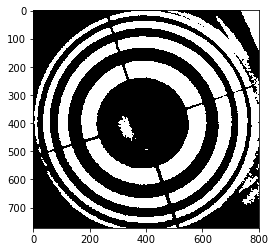

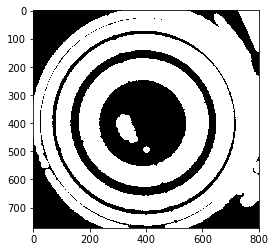

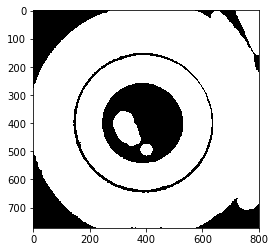

In [3]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
dc1=morphology.dilation(contour, morphology.disk(1))
dc2=morphology.dilation(contour, morphology.disk(10))
dc3=morphology.dilation(contour, morphology.disk(20))
plt.figure
plt.imshow(dc1, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(dc2, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(dc3, cmap=plt.cm.gray)
plt.show()


** Q.1.3 Opening **

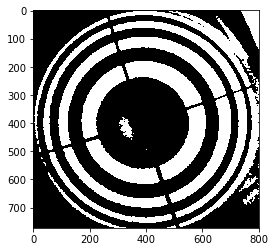

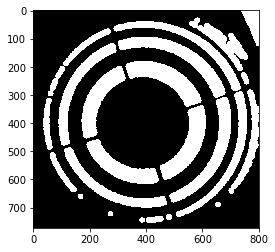

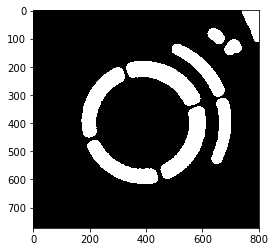

In [4]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
oc1=morphology.opening(contour,morphology.disk(1))
oc2=morphology.opening(contour,morphology.disk(10))
oc3=morphology.opening(contour,morphology.disk(20))
plt.figure
plt.imshow(oc1, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(oc2, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(oc3, cmap=plt.cm.gray)
plt.show()

** Q.1.4 Closing**

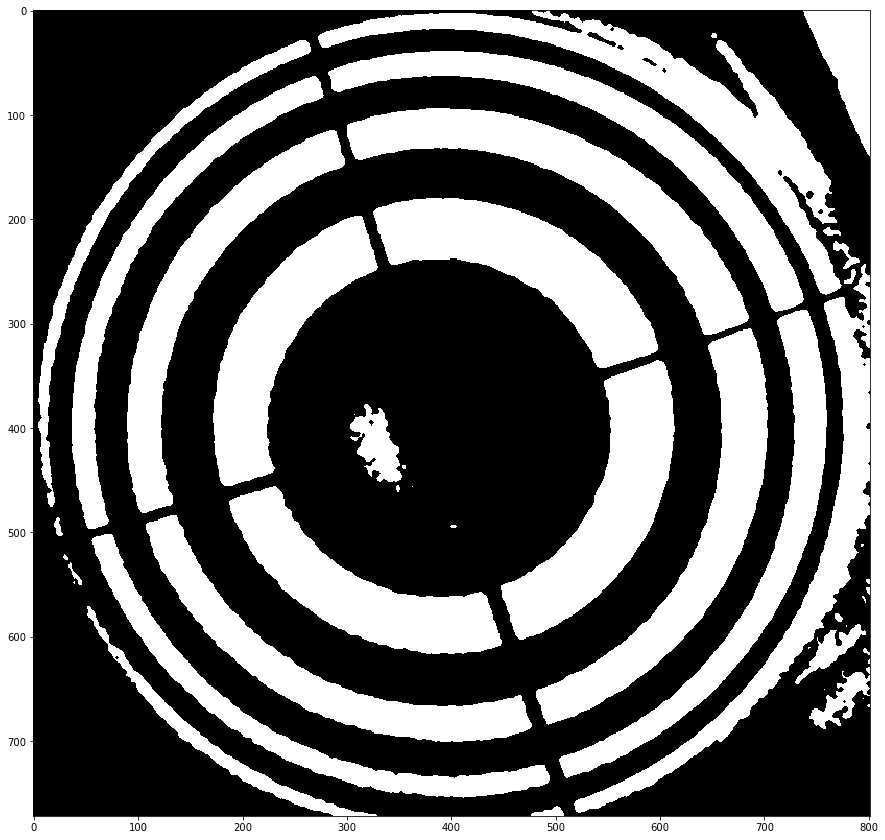

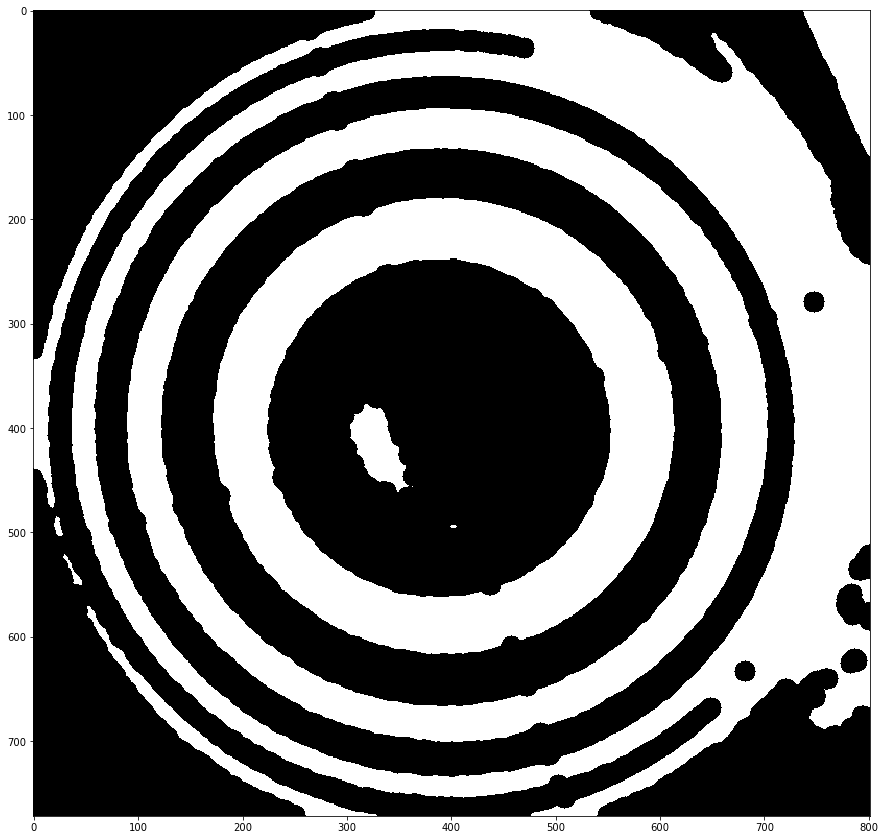

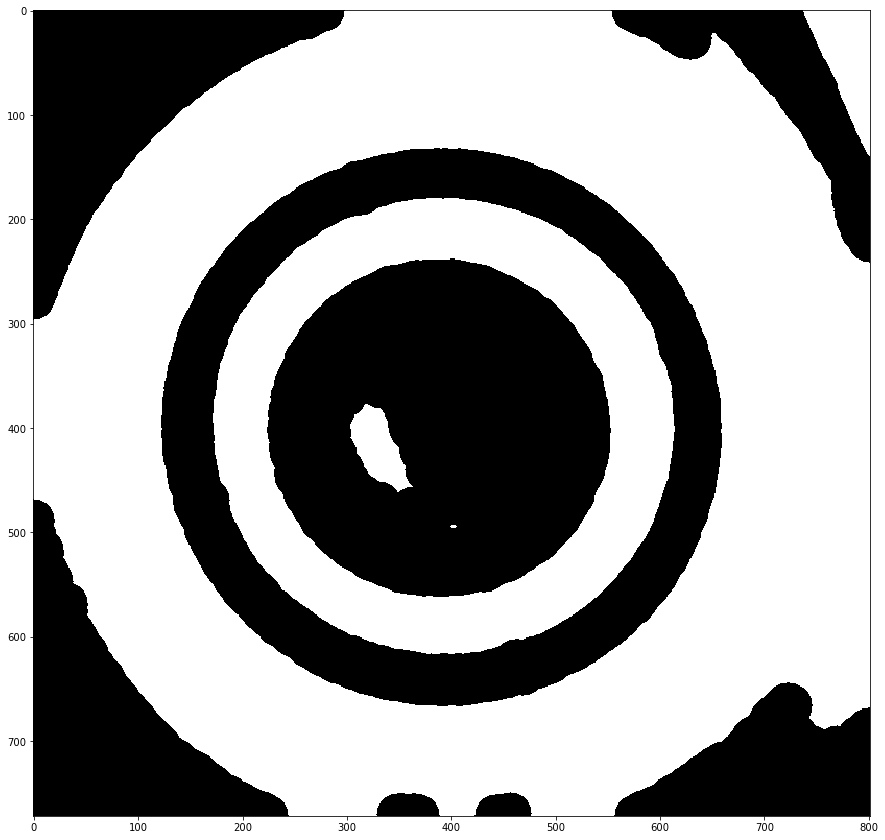

In [26]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
cc1=morphology.closing(contour,morphology.disk(1))
cc2=morphology.closing(contour,morphology.disk(10))
cc3=morphology.closing(contour,morphology.disk(20))
plt.figure(figsize=(15,15))
plt.imshow(cc1, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(15,15))
plt.imshow(cc2, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(15,15))
plt.imshow(cc3, cmap=plt.cm.gray)
plt.show()

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

erosion=shrink the object;
dilation=thickening the object;
opening&closing= total of erosin and dilation;
opening=more dilation behaviour;
closing=more erosion behaviour

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

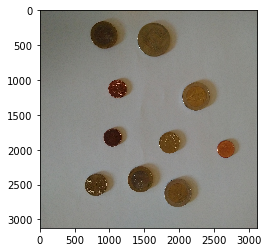

In [6]:
Path = './images/'
image_name = 'coins.jpg'
coin = io.imread(Path.__add__(image_name))
coin = img_as_ubyte(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()



**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

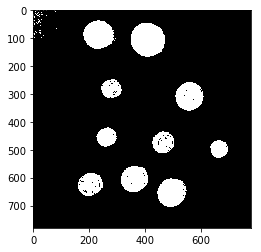

In [12]:
from skimage import filters
Path = './images/'
image_name = 'coins.jpg'
coin = io.imread(Path.__add__(image_name), as_grey=True)
coin = img_as_ubyte(coin)
coin=rescale(coin, .25)
coin = coin<=filters.threshold_otsu(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()


**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

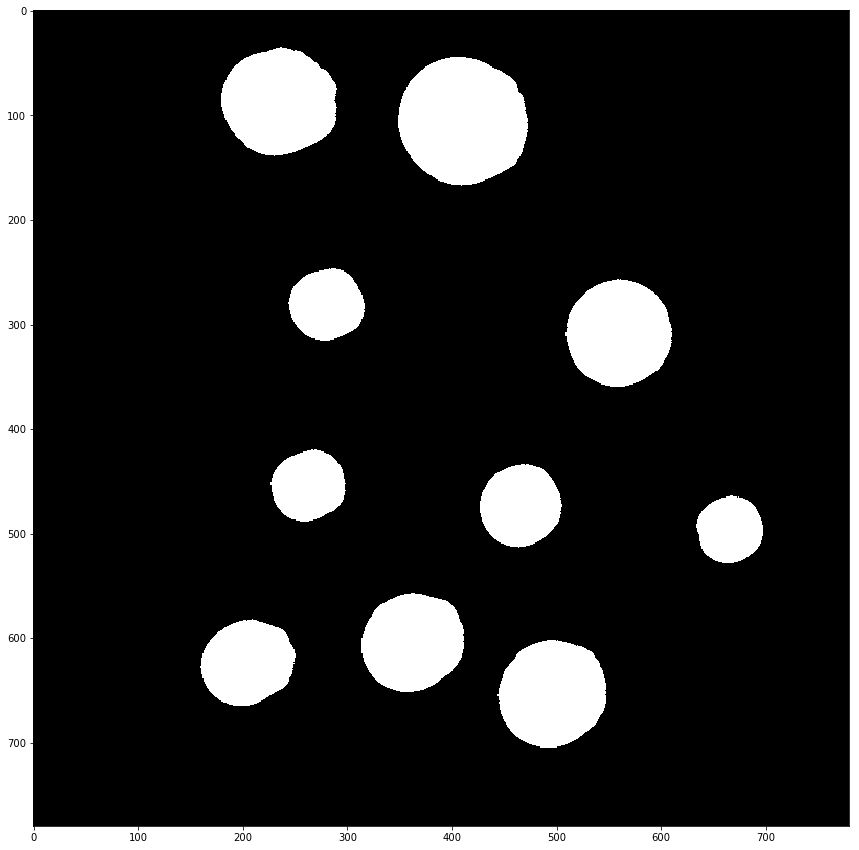

In [25]:
ec1=morphology.closing(coin , morphology.disk(2)) #if we use 1 as disk radius; still we had one dot in one of coins (poisition of the coing is like (2,2))
dc2=morphology.opening(ec1, morphology.disk(10))
plt.figure(figsize=(15,15))
plt.imshow(dc2, cmap=plt.cm.gray)
plt.show()




**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


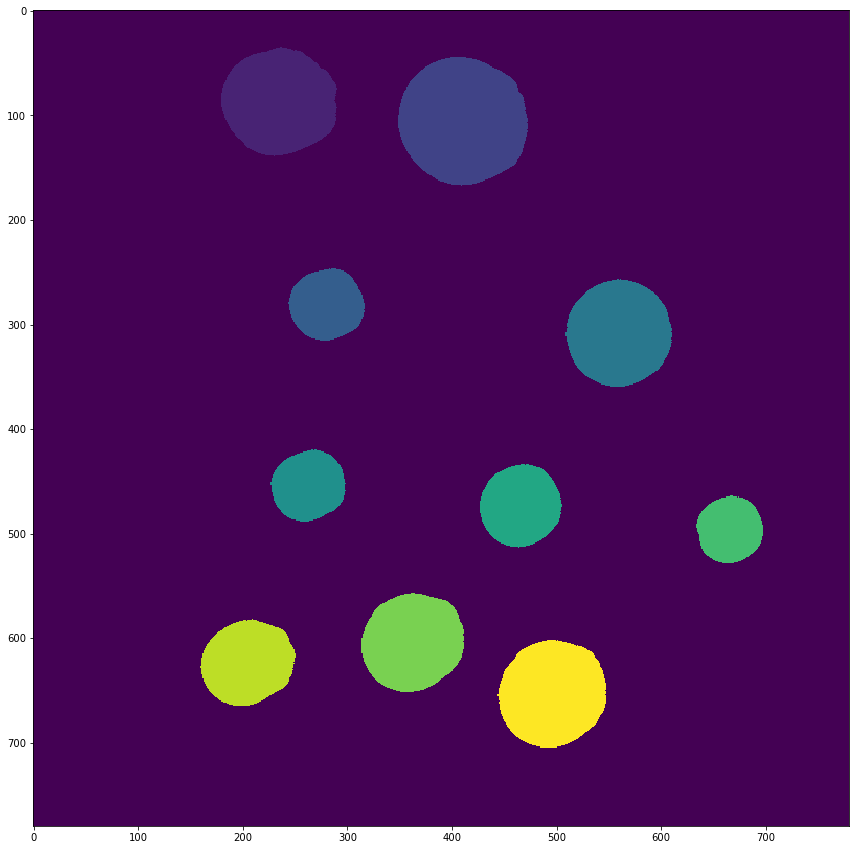

The number of regions is  10
1
The radius of the region is 62 pxs
The area of the region is 12018 pxs
2
The radius of the region is 35 pxs
The area of the region is 3910 pxs
3
The radius of the region is 51 pxs
The area of the region is 8179 pxs
4
The radius of the region is 35 pxs
The area of the region is 3838 pxs
5
The radius of the region is 39 pxs
The area of the region is 4881 pxs
6
The radius of the region is 32 pxs
The area of the region is 3252 pxs
7
The radius of the region is 48 pxs
The area of the region is 7362 pxs
8
The radius of the region is 43 pxs
The area of the region is 5795 pxs
9
The radius of the region is 52 pxs
The area of the region is 8443 pxs


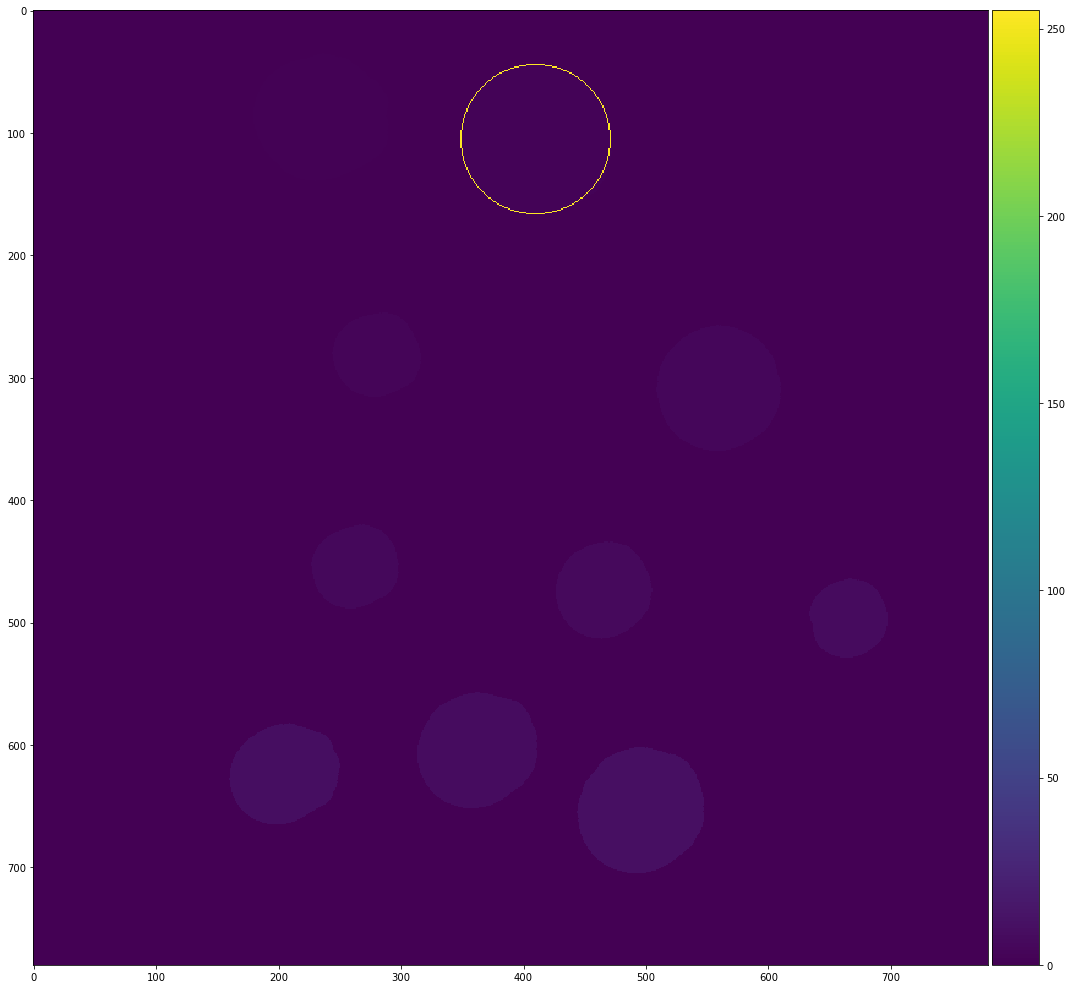

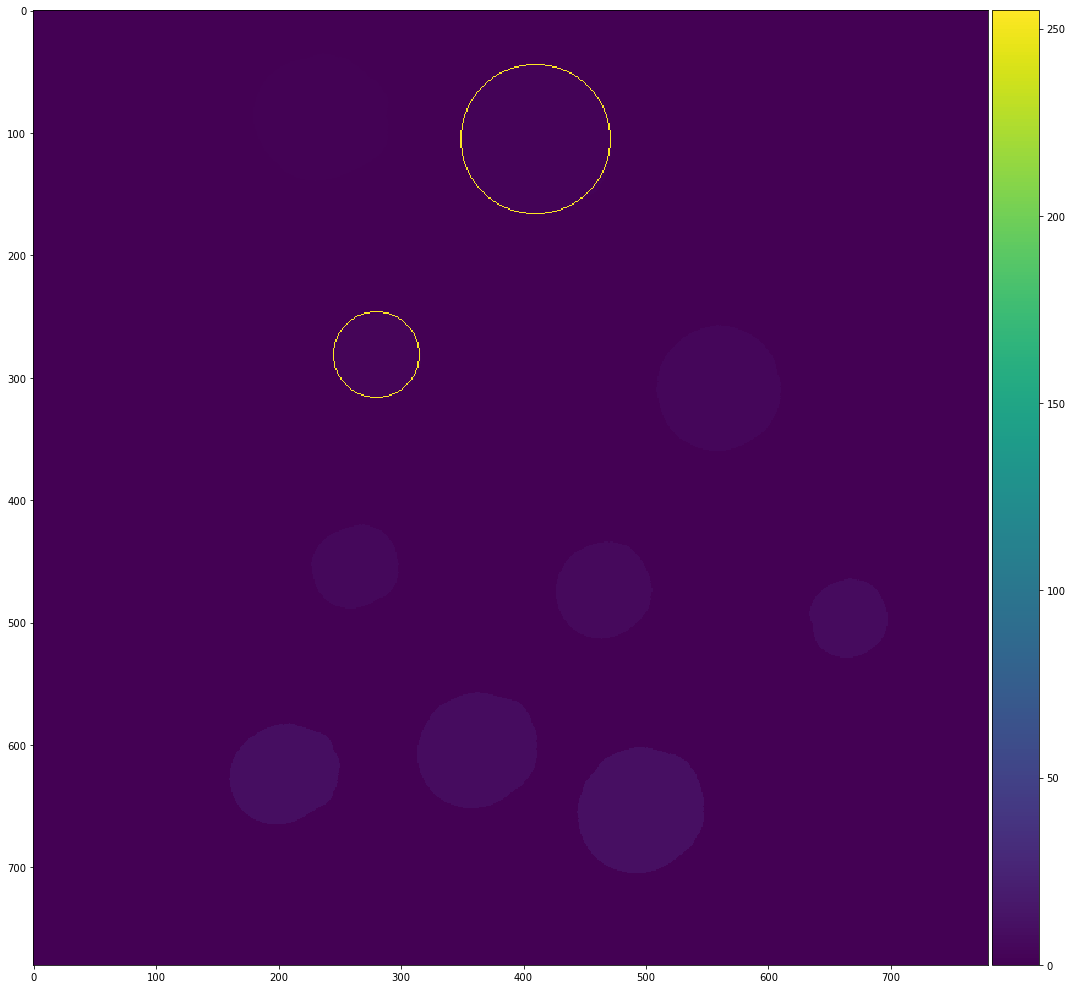

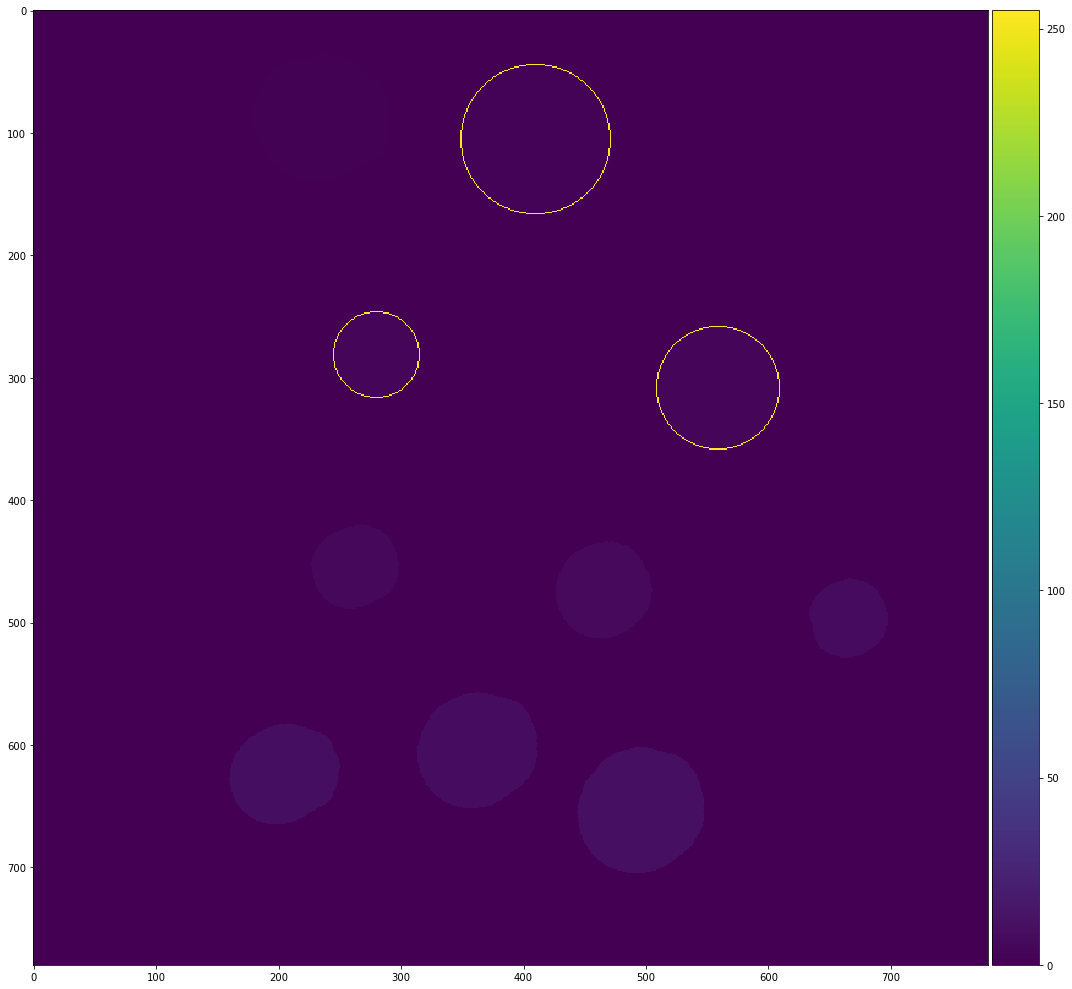

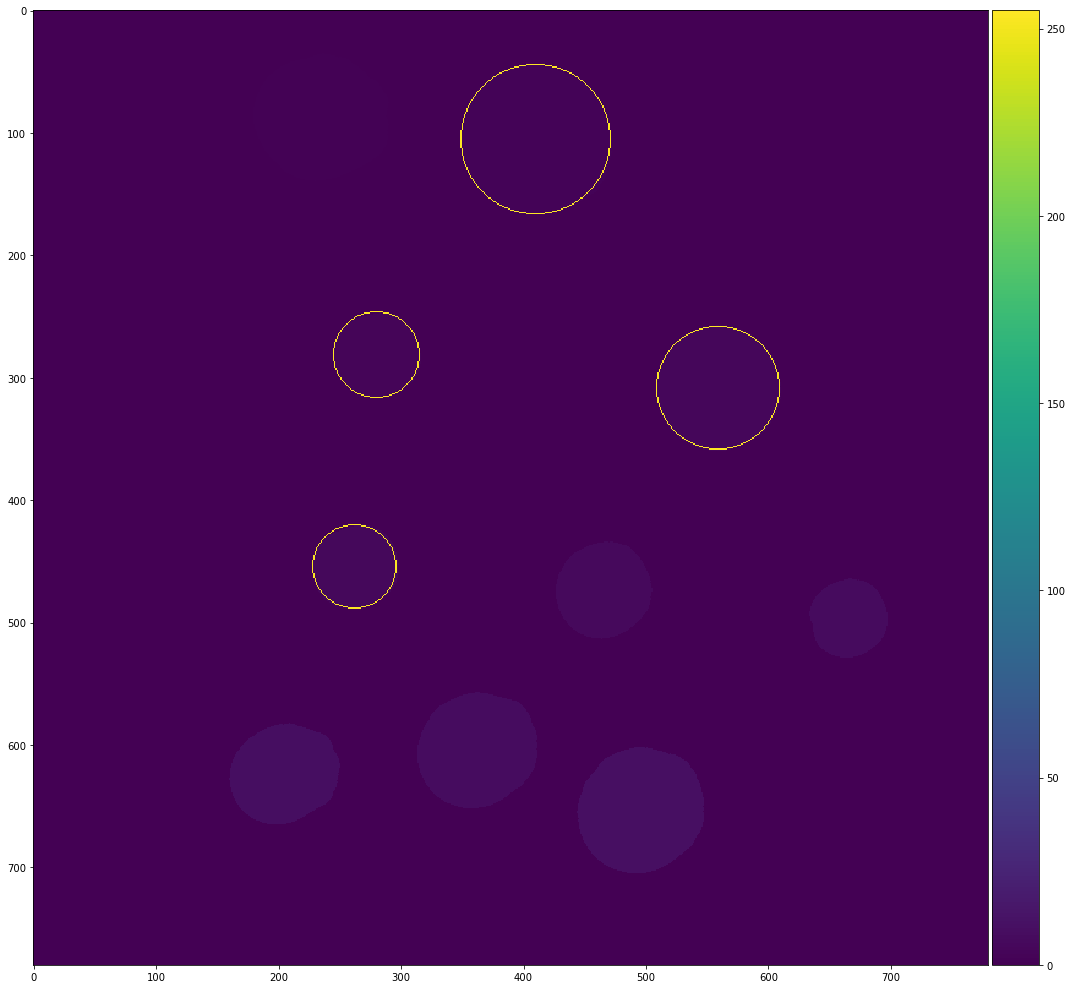

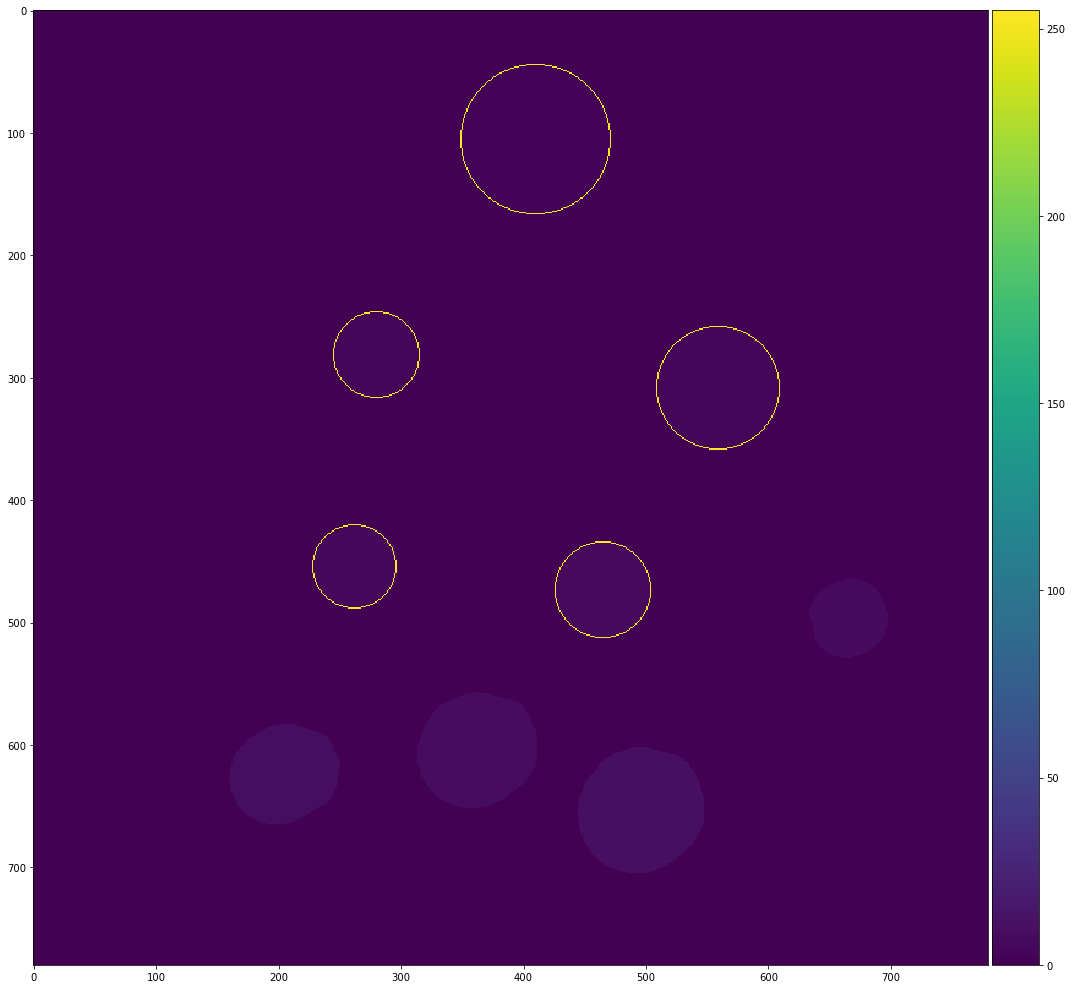

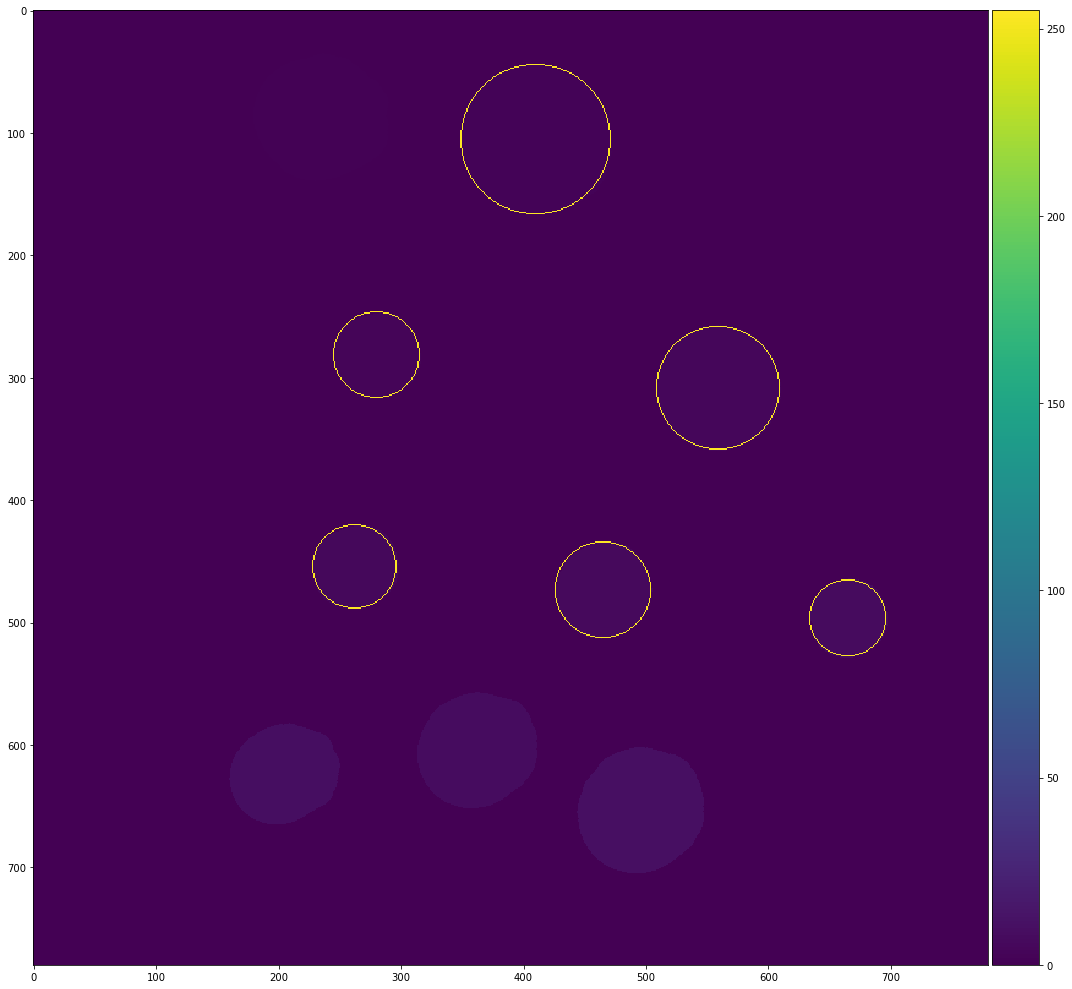

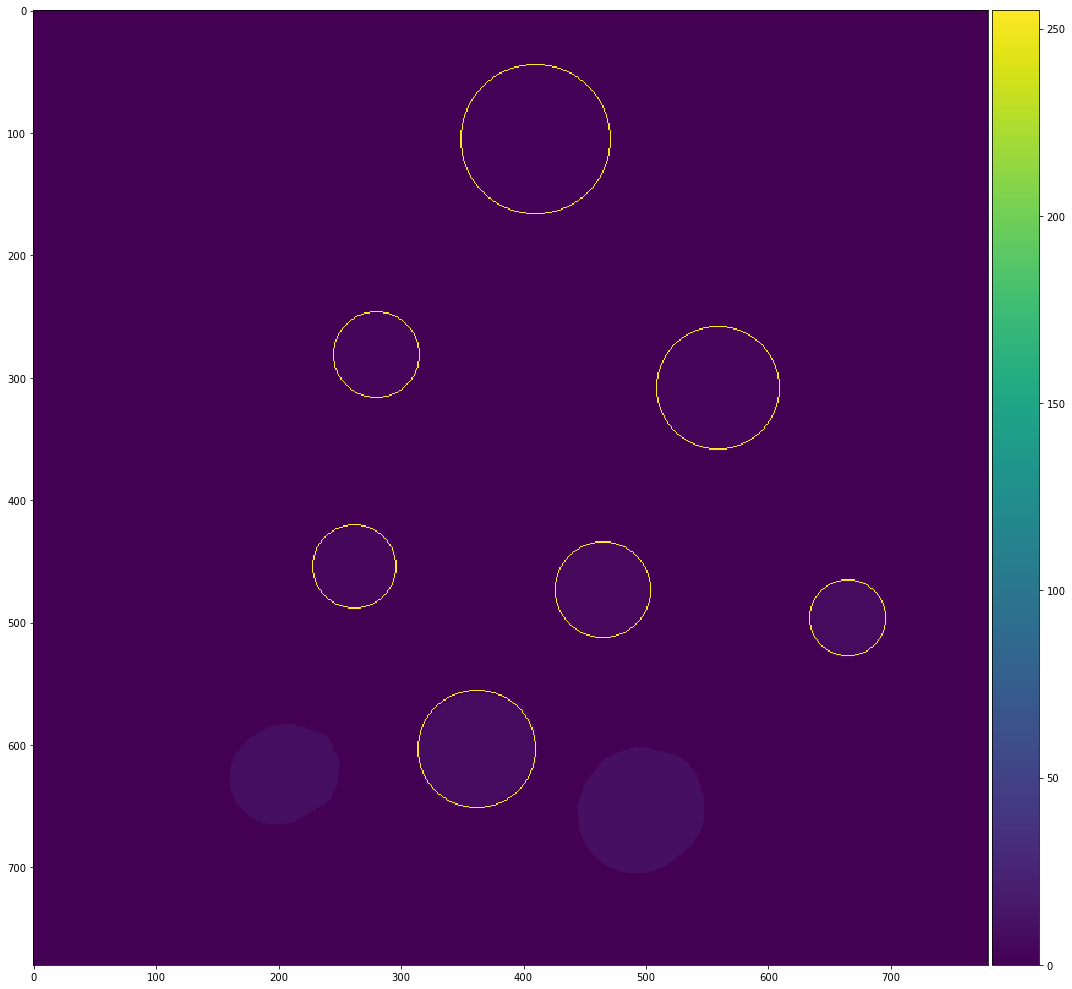

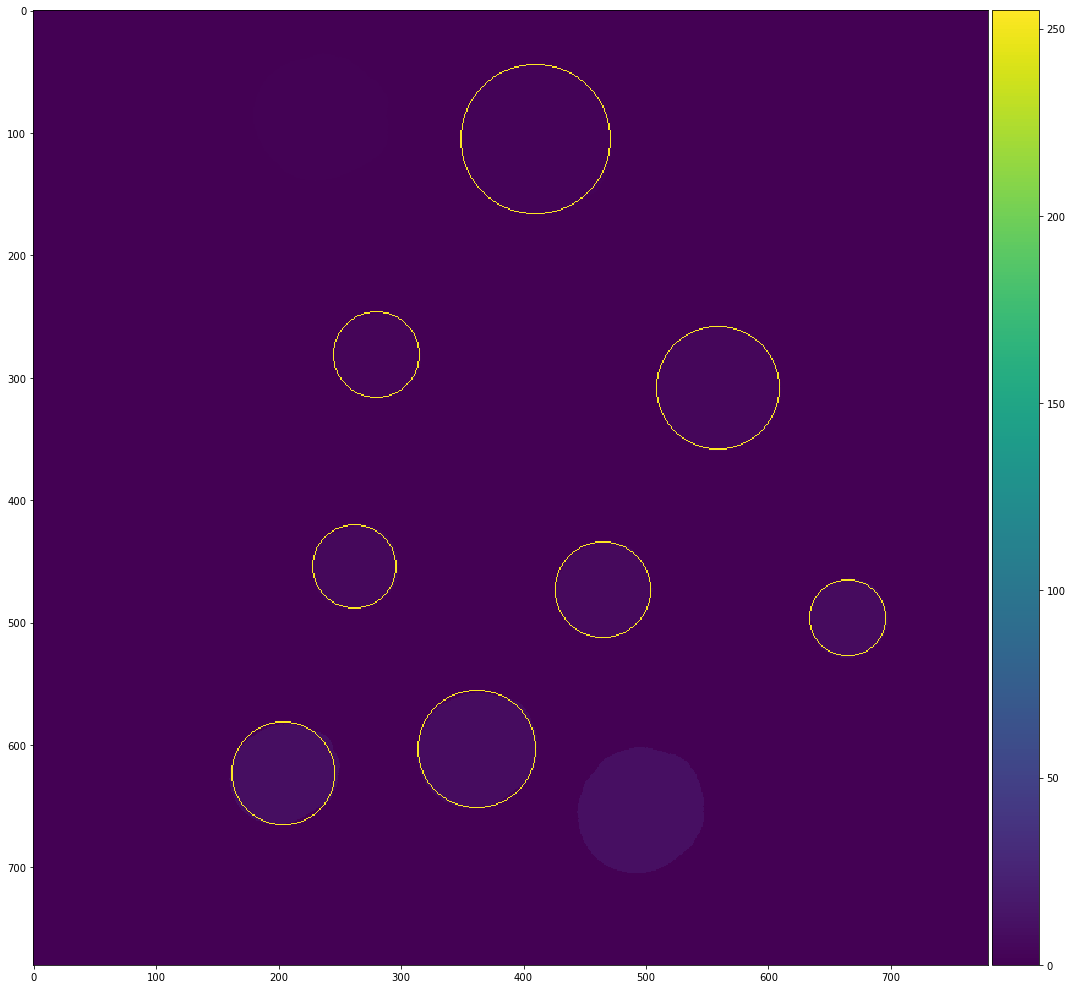

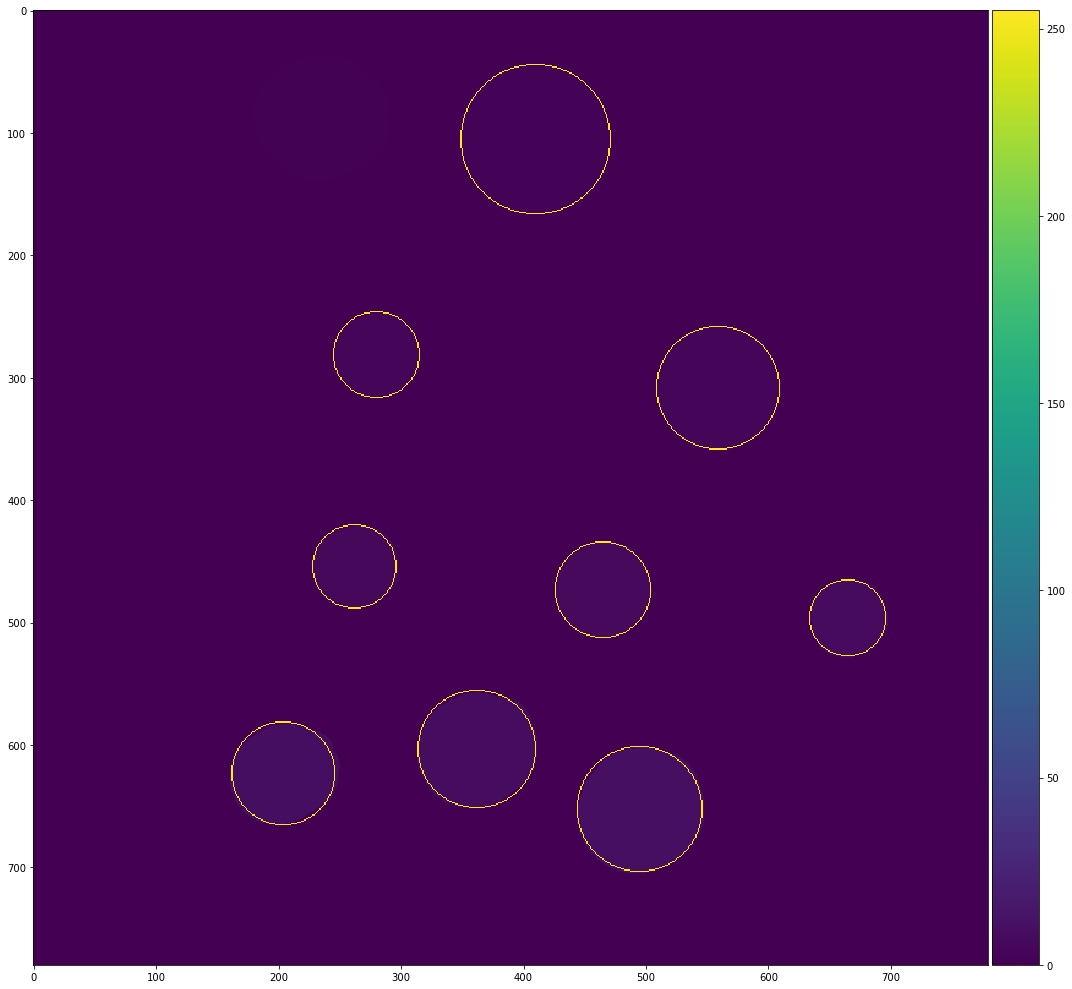

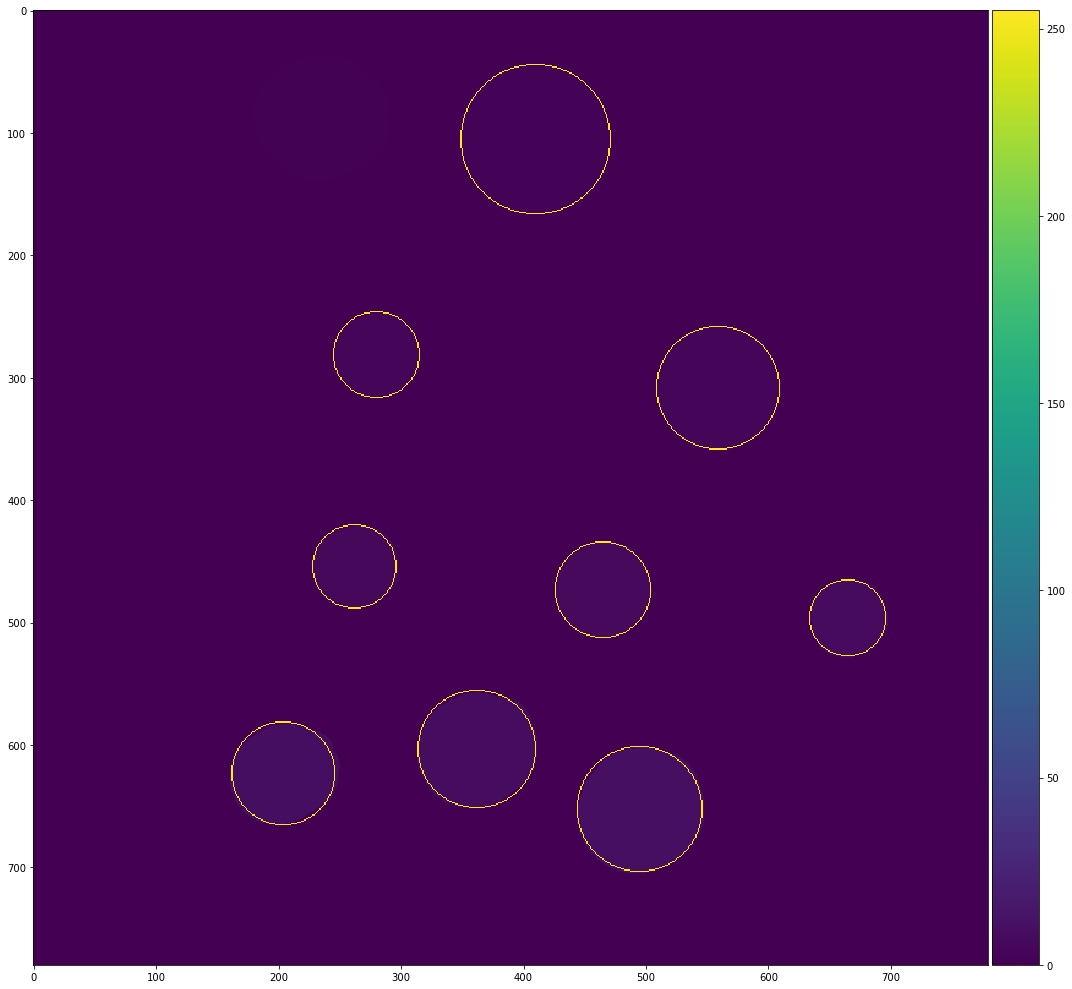

In [59]:
#question 1
from skimage import measure
lab, nlables =measure.label(dc2, return_num=True) #nlables=number of labels
plt.figure(figsize=(15,15))
plt.imshow(lab)
plt.show()
#question 2
prop=measure.regionprops(lab)
print('The number of regions is  {}'.format((nlables)))
#question 3
from skimage.draw import circle_perimeter
for idx_region, region in enumerate(prop):
    if idx_region==0:
        continue
    radius=region.equivalent_diameter/ 2.
    print(idx_region)
    print('The radius of the region is {:.0f} pxs'.format(radius))
    print('The area of the region is {:.0f} pxs'.format(region.convex_area)) 
    circle_coord=circle_perimeter(int(region.centroid[0]),int(region.centroid[1]),int(radius))
    lab[circle_coord[0],circle_coord[1]]=255
    plt.figure(figsize=(15,15))
    io.imshow(lab)
plt.figure(figsize=(15,15))
io.imshow(lab)  

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

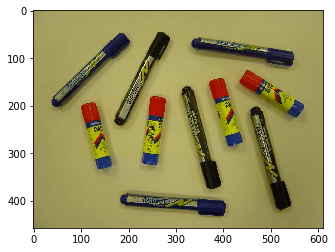

In [63]:
Path = './images/'
image_name = 'objets4.jpg'
coin = io.imread(Path.__add__(image_name))
coin = img_as_ubyte(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()

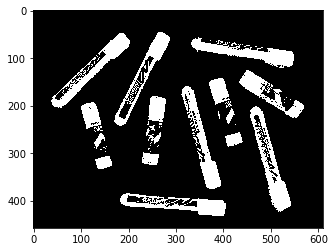

In [77]:
from skimage import filters
Path = './images/'
image_name = 'objets4.jpg'
coin = io.imread(Path.__add__(image_name), as_grey=True)
coin = img_as_ubyte(coin)

coin = coin<=filters.threshold_otsu(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()


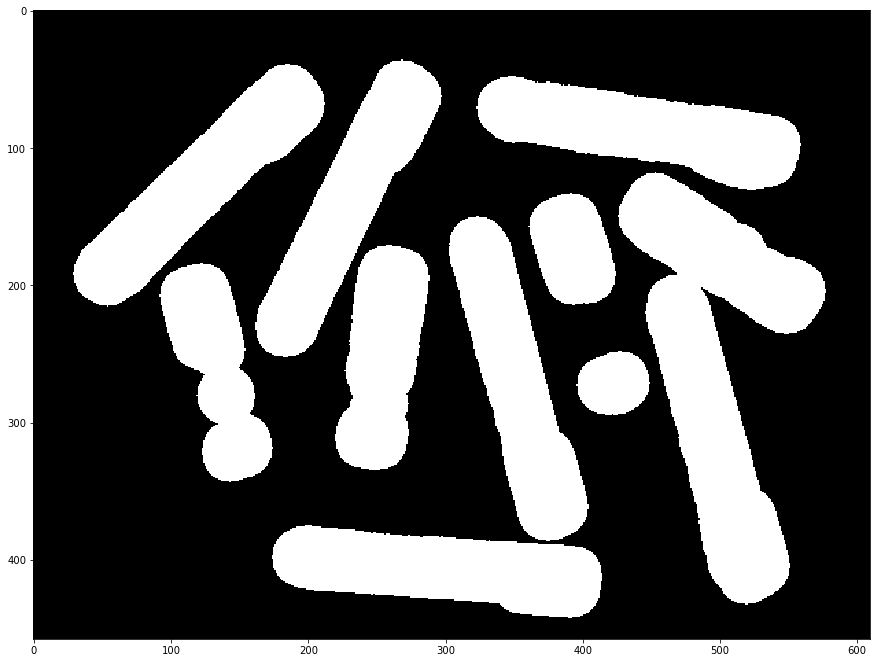

In [103]:
ec1=morphology.closing(coin , morphology.disk(1)) #if we use 1 as disk radius; still we had one dot in one of coins (poisition of the coing is like (2,2))
dc2=morphology.dilation(ec1,morphology.disk(10))
fc2=morphology.opening(dc2,morphology.disk(20))

plt.figure(figsize=(15,15))
plt.imshow(fc2, cmap=plt.cm.gray)
plt.show()
